### Business challenge and objectives

Objective: to predict which users are most likely to churn, thereby allowing the company to re-engage/advertise to these users.

We're working for a fintech company that has a subscription product that allows a user to manage their finances.

Data:
- We will have access to users' finances and how they handle finances through the product.

- We also have demographic info acquired from sign-up process

- Caveat: financial data can be unreliable and delayed, so companies are more likely to use demographic data instead. 

Dataset -
Our dataset will include fields such as:
- User ID

- Whether they churned (0 or 1) response variable

- Age

- Housing (na, R = renting, O = owner)

- Credit score

- Deposits = number of deposits

- Withdrawals = number of withdrawals

- Purchases = how many purchases outside of company partner stores

- Purchases_special = number of purchases with company partner stores

- CC_taken = number of credit cards

and more...

### Data cleaning

In [98]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [99]:
dataset = pd.read_csv("P39-Minimizing-Churn-Data/churn_data.csv")

In [100]:
dataset.head()

,user,churn,age,housing,credit_score,deposits,withdrawal,purchases_partners,purchases,cc_taken,...,waiting_4_loan,cancelled_loan,received_loan,rejected_loan,zodiac_sign,left_for_two_month_plus,left_for_one_month,rewards_earned,reward_rate,is_referred
0,55409,0,37.0,na,NaN,0,0,0,0,0,...,0,0,0,0,Leo,1,0,NaN,0.00,0
1,23547,0,28.0,R,486.0,0,0,1,0,0,...,0,0,0,0,Leo,0,0,44.0,1.47,1
2,58313,0,35.0,R,561.0,47,2,86,47,0,...,0,0,0,0,Capricorn,1,0,65.0,2.17,0
3,8095,0,26.0,R,567.0,26,3,38,25,0,...,0,0,0,0,Capricorn,0,0,33.0,1.10,1
4,61353,1,27.0,na,NaN,0,0,2,0,0,...,0,0,0,0,Aries,1,0,1.0,0.03,0


In [101]:
dataset.columns

Index(['user', 'churn', 'age', 'housing', 'credit_score', 'deposits',
       'withdrawal', 'purchases_partners', 'purchases', 'cc_taken',
       'cc_recommended', 'cc_disliked', 'cc_liked', 'cc_application_begin',
       'app_downloaded', 'web_user', 'app_web_user', 'ios_user',
       'android_user', 'registered_phones', 'payment_type', 'waiting_4_loan',
       'cancelled_loan', 'received_loan', 'rejected_loan', 'zodiac_sign',
       'left_for_two_month_plus', 'left_for_one_month', 'rewards_earned',
       'reward_rate', 'is_referred'],
      dtype='object')

In [102]:
dataset.describe()

,user,churn,age,credit_score,deposits,withdrawal,purchases_partners,purchases,cc_taken,cc_recommended,...,registered_phones,waiting_4_loan,cancelled_loan,received_loan,rejected_loan,left_for_two_month_plus,left_for_one_month,rewards_earned,reward_rate,is_referred
count,27000.000000,27000.000000,26996.000000,18969.000000,27000.000000,27000.000000,27000.000000,27000.000000,27000.000000,27000.000000,...,27000.000000,27000.000000,27000.000000,27000.000000,27000.000000,27000.000000,27000.000000,23773.000000,27000.000000,27000.000000
mean,35422.702519,0.413852,32.219921,542.944225,3.341556,0.307000,28.062519,3.273481,0.073778,92.625778,...,0.420926,0.001296,0.018815,0.018185,0.004889,0.173444,0.018074,29.110125,0.907684,0.318037
std,20321.006678,0.492532,9.964838,61.059315,9.131406,1.055416,42.219686,8.953077,0.437299,88.869343,...,0.912831,0.035981,0.135873,0.133623,0.069751,0.378638,0.133222,21.973478,0.752016,0.465723
min,1.000000,0.000000,17.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
25%,17810.500000,0.000000,25.000000,507.000000,0.000000,0.000000,0.000000,0.000000,0.000000,10.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,0.200000,0.000000
50%,35749.000000,0.000000,30.000000,542.000000,0.000000,0.000000,9.000000,0.000000,0.000000,65.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,25.000000,0.780000,0.000000
75%,53244.250000,1.000000,37.000000,578.000000,1.000000,0.000000,43.000000,1.000000,0.000000,164.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,48.000000,1.530000,1.000000
max,69658.000000,1.000000,91.000000,838.000000,65.000000,29.000000,1067.000000,63.000000,29.000000,522.000000,...,5.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,114.000000,4.000000,1.000000


In [103]:
# Removing NaN
dataset.isna().any() # tells us which columns have at least 1 NaN

user                       False
churn                      False
age                         True
housing                    False
credit_score                True
deposits                   False
withdrawal                 False
purchases_partners         False
purchases                  False
cc_taken                   False
cc_recommended             False
cc_disliked                False
cc_liked                   False
cc_application_begin       False
app_downloaded             False
web_user                   False
app_web_user               False
ios_user                   False
android_user               False
registered_phones          False
payment_type               False
waiting_4_loan             False
cancelled_loan             False
received_loan              False
rejected_loan              False
zodiac_sign                False
left_for_two_month_plus    False
left_for_one_month         False
rewards_earned              True
reward_rate                False
is_referre

In [104]:
dataset.isna().sum() # how many NaN values in each column

user                          0
churn                         0
age                           4
housing                       0
credit_score               8031
deposits                      0
withdrawal                    0
purchases_partners            0
purchases                     0
cc_taken                      0
cc_recommended                0
cc_disliked                   0
cc_liked                      0
cc_application_begin          0
app_downloaded                0
web_user                      0
app_web_user                  0
ios_user                      0
android_user                  0
registered_phones             0
payment_type                  0
waiting_4_loan                0
cancelled_loan                0
received_loan                 0
rejected_loan                 0
zodiac_sign                   0
left_for_two_month_plus       0
left_for_one_month            0
rewards_earned             3227
reward_rate                   0
is_referred                   0
dtype: i

In [105]:
# Because of the large number of NaN values, we will remove
# credit_score and rewards_earned columns entirely

# Because of only 4 missing values of age, we will remove those 4 values

dataset = dataset[pd.notnull(dataset["age"])]
dataset = dataset.drop(columns = ["credit_score", "rewards_earned"])
dataset.isna().sum() # we confirm the lack of NaN values

user                       0
churn                      0
age                        0
housing                    0
deposits                   0
withdrawal                 0
purchases_partners         0
purchases                  0
cc_taken                   0
cc_recommended             0
cc_disliked                0
cc_liked                   0
cc_application_begin       0
app_downloaded             0
web_user                   0
app_web_user               0
ios_user                   0
android_user               0
registered_phones          0
payment_type               0
waiting_4_loan             0
cancelled_loan             0
received_loan              0
rejected_loan              0
zodiac_sign                0
left_for_two_month_plus    0
left_for_one_month         0
reward_rate                0
is_referred                0
dtype: int64

### Exploratory Data Analysis (EDA)

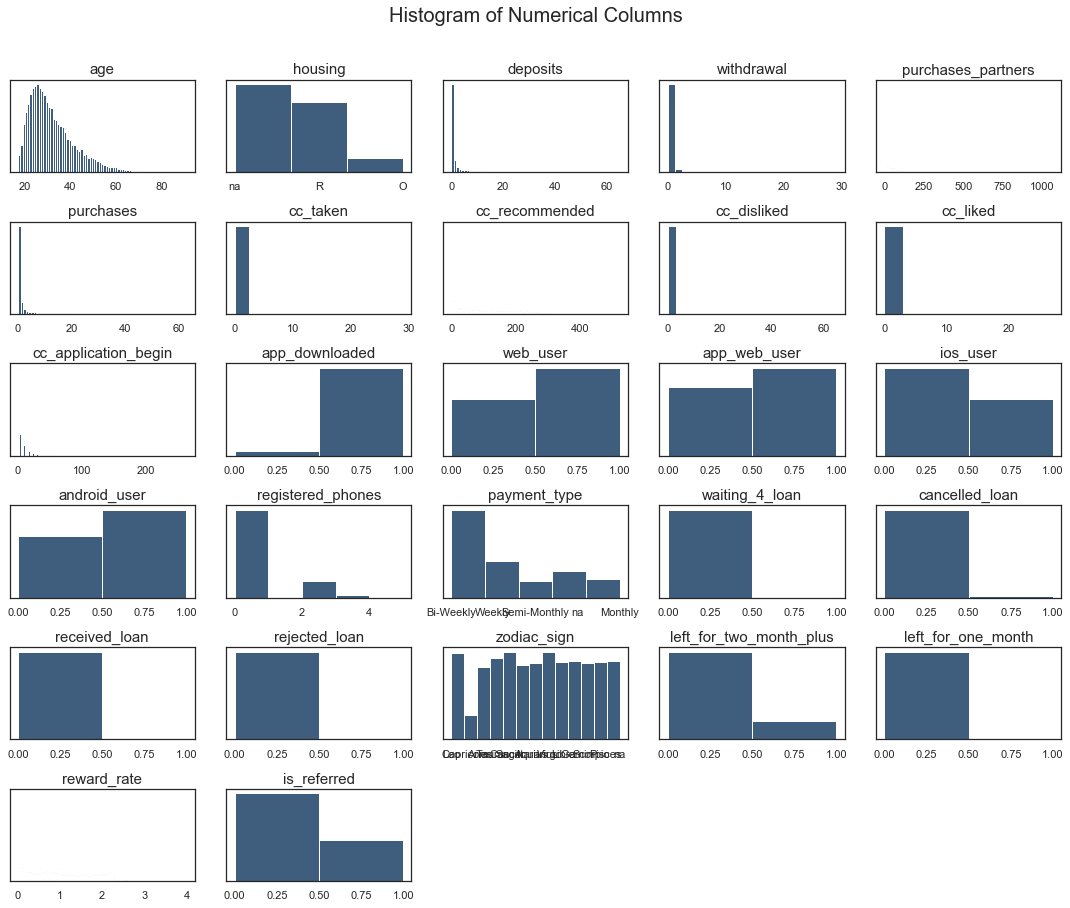

In [106]:
# we now take a subset of of the dataset containing only
# numerical columns
subplot_title_info = {'fontsize': 15,
        'fontweight' : 5,
        'verticalalignment': 'baseline',
        'horizontalalignment': 'center'}

dataset2 = dataset.drop(columns = ["user", "churn"])

fig = plt.figure(figsize = (15, 12))
plt.suptitle("Histogram of Numerical Columns", fontsize=20,
            x = 0.5, y = 1.55)
for i in range(1, dataset2.shape[1] + 1):
    plt.subplot(6, 5, i) # dimensions of our plot
    f = plt.gca() # get current axis index
    f.set_title(dataset2.columns.values[i - 1], subplot_title_info)
    f.axes.get_yaxis().set_visible(False)
    vals = np.size(dataset2.iloc[:, i - 1].unique())
    plt.hist(dataset2.iloc[:, i-1], bins = vals, color = "#3F5D7D")

plt.tight_layout(rect = [0, 0.5, 1, 1.5])

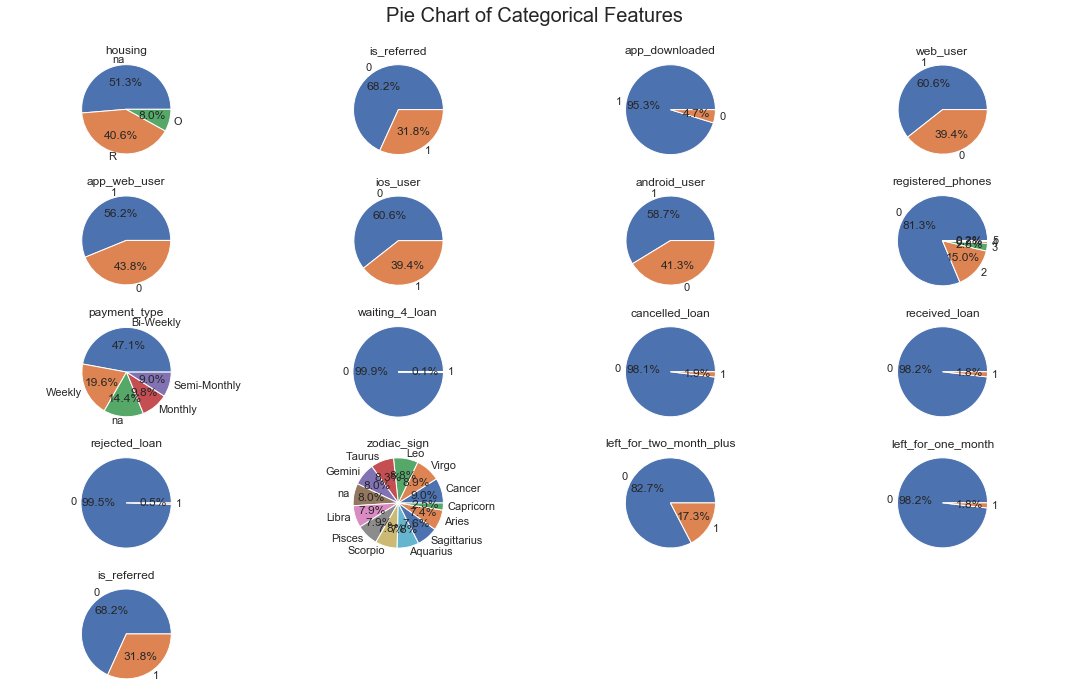

In [107]:
# we produce pie charts for only binary data
dataset2 = dataset[['housing', 'is_referred', 'app_downloaded',
                    'web_user', 'app_web_user', 'ios_user',
                    'android_user', 'registered_phones', 'payment_type',
                    'waiting_4_loan', 'cancelled_loan',
                    'received_loan', 'rejected_loan', 'zodiac_sign',
                    'left_for_two_month_plus', 'left_for_one_month', 'is_referred']]

fig = plt.figure(figsize=(15, 12))
plt.suptitle('Pie Chart of Categorical Features', fontsize=20)
for i in range(1, dataset2.shape[1] + 1):
    plt.subplot(6, 4, i)
    f = plt.gca()
    f.axes.get_yaxis().set_visible(False)
    f.set_title(dataset2.columns.values[i - 1])
    values = dataset2.iloc[:, i - 1].value_counts(normalize = True).values
    index = dataset2.iloc[:, i - 1].value_counts(normalize = True).index
    plt.pie(values, labels = index, autopct='%1.1f%%')
    plt.axis('equal')
fig.tight_layout(rect=[0, 0.03, 1, 0.95])

In [108]:
## Exploring Uneven Features
dataset[dataset2.waiting_4_loan == 1].churn.value_counts()

0    27
1     8
Name: churn, dtype: int64

In [109]:
dataset[dataset2.cancelled_loan == 1].churn.value_counts()

1    274
0    234
Name: churn, dtype: int64

In [110]:
dataset[dataset2.received_loan == 1].churn.value_counts()

1    292
0    199
Name: churn, dtype: int64

In [111]:
dataset[dataset2.left_for_one_month == 1].churn.value_counts()

1    266
0    222
Name: churn, dtype: int64

In [112]:
dataset[dataset2.rejected_loan == 1].churn.value_counts()

1    107
0     25
Name: churn, dtype: int64

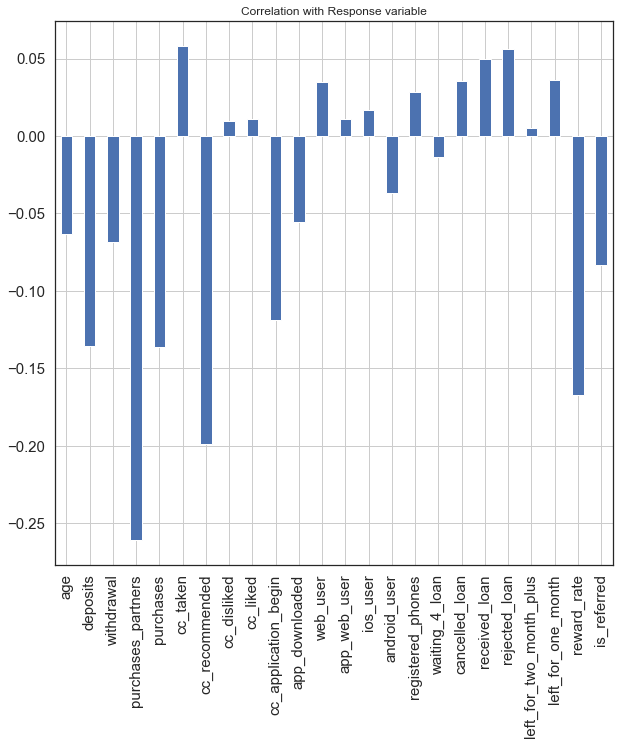

In [113]:
# Correlation Plot
# First drop the response variable
# Also drop all categorical variables
dataset.drop(columns = ["churn", "user", "housing", 
                       "payment_type", "zodiac_sign"]).corrwith(dataset.churn).plot.bar(figsize=(10,10),
              title = 'Correlation with Response variable',
              fontsize = 15, rot = 90,
              grid = True)

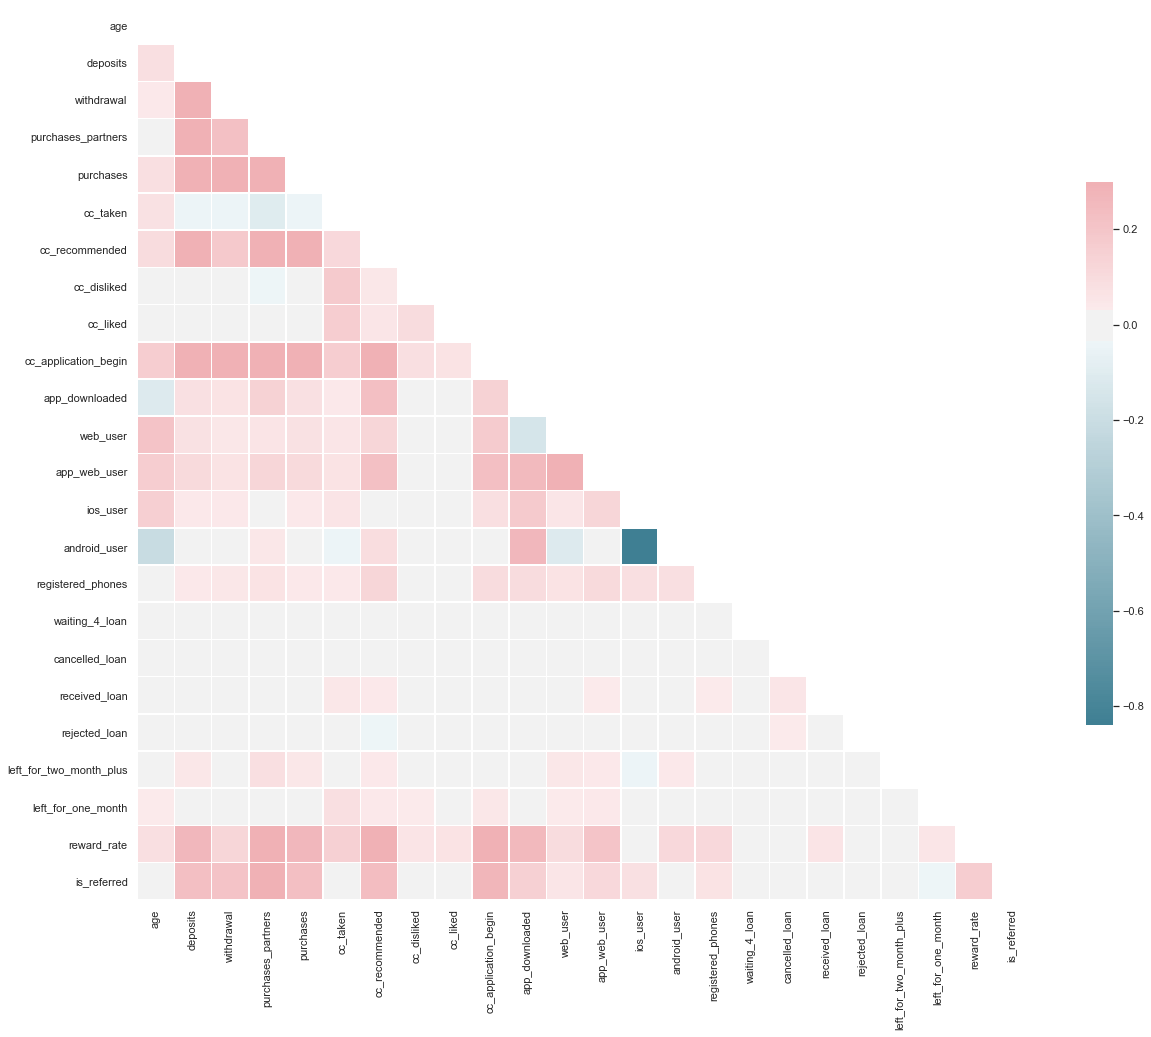

In [114]:
# Correlation Matrix
sns.set(style="white")

# Compute the correlation matrix
corr = dataset.drop(columns = ['user', 'churn']).corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype = np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(20, 20))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

In [115]:
# Removing Correlated Fields
dataset = dataset.drop(columns = ['app_web_user'])

In [116]:
## Although there are somewhat correlated fields, they are not colinear
## These feature are not functions of each other, so they won't break the model
## But these features won't help much either. Feature Selection should remove them.
dataset.to_csv('new_churn_data.csv', index = False)

### Feature processing

In [117]:
dataset = pd.read_csv('new_churn_data.csv')

In [118]:
# User ID is not useful in model building
# But once we have results, we will need to match predictions
# to user IDs.
user_identifier = dataset['user']
dataset = dataset.drop(columns = ['user'])

In [119]:
# Return a Series containing counts of unique values.
# The resulting object will be in descending order so that the
# first element is the most frequently-occurring element.
# Excludes NA values by default.
dataset.housing.value_counts()
# Convert categorical variable into dummy/indicator variables.
dataset = pd.get_dummies(data = dataset)
dataset.columns

# we drop some columns to avoid correlation
dataset = dataset.drop(columns = ['housing_na', 'zodiac_sign_na', 'payment_type_na'])

In [120]:
# Splitting the dataset into training and test set
from sklearn.model_selection import train_test_split
X = dataset.drop(columns = "churn")
y = dataset["churn"]
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size = 0.2,
                                                    random_state = 0)

In [121]:
# Balancing the training set
y_train.value_counts()

# Thought experiment:
# Suppose our training set has a 60-40 split of 0 and 1s
# A completely bias null model that only returns 0 would
# still have an accuracy of 60% relative to the training set.
# We need to balance the 0/1 split in the training set in order
# to avoid this issue.

# Balancing algorithm:
# 1) identify higher = category with more values
# 2) take a random sample of size(len(lower)) from higher
# 3) X_train and y_train will contain a 50-50 split of 0 and 1s

pos_index = y_train[y_train.values == 1].index
neg_index = y_train[y_train.values == 0].index

if len(pos_index) > len(neg_index):
    higher = pos_index
    lower = neg_index
else:
    higher = neg_index
    lower = pos_index
    
import random

random.seed(0) # set a seed for duplication purposes
# higher = random sample from the "higher" array with size of lower
higher = np.random.choice(higher, size=len(lower))
# convert lower into an array
lower = np.asarray(lower)
#
new_indices = np.concatenate((lower, higher))

X_train = X_train.loc[new_indices, ]
y_train = y_train[new_indices]

In [122]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X_train2 = pd.DataFrame(sc_X.fit_transform(X_train))
X_test2 = pd.DataFrame(sc_X.fit_transform(X_test))
X_train2.columns = X_train.columns.values
X_test2.columns = X_test.columns.values
X_train = X_train2
X_test = X_test2

### Model Building

In [123]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state = 0)
classifier.fit(X = X_train, y = y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=0, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [124]:
y_pred = classifier.predict(X = X_test)

Test Data Accuracy: 0.607


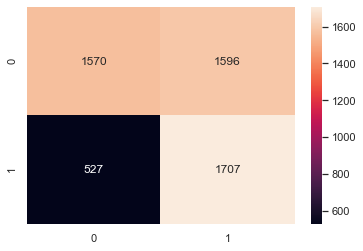

In [133]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
cm = confusion_matrix(y_true = y_test, y_pred = y_pred)
sns.heatmap(data = cm, annot = True, fmt = 'g')
print("Test Data Accuracy: %0.3f" % accuracy_score(y_test, y_pred))

In [126]:
print(classification_report(y_true = y_test, y_pred = y_pred))
# Precision = # True Positives / (# True Positives + # False Positives)
# Accuracy = # Correct Predictions / # Total Predictions
# Recall = # True Positives / # True Positives + # False Negatives

              precision    recall  f1-score   support

           0       0.75      0.50      0.60      3166
           1       0.52      0.76      0.62      2234

    accuracy                           0.61      5400
   macro avg       0.63      0.63      0.61      5400
weighted avg       0.65      0.61      0.60      5400



In [134]:
from sklearn.model_selection import cross_val_score
# Perform 10-fold cross-validation
accuracies = cross_val_score(estimator = classifier,
                            X = X_train,
                            y = y_train,
                            cv = 10)
print("10-fold Cross-validated accuracy: %0.3f (+/- %0.3f)" % (accuracies.mean(), accuracies.std() * 2))

10-fold Cross-validated accuracy: 0.641 (+/- 0.022)


In [136]:
# Analyzing model coefficients
pd.concat([pd.DataFrame(X_train.columns, columns = ["features"]),
          pd.DataFrame(np.transpose(classifier.coef_),
                      columns = ["coefficients"])],
         axis = 1)
# Based on the absolute value of each coefficient
# we can determine which features most importantly
# predict churn rate( e.g. age, deposits, purchases_partners)

,features,coefficients
0,age,-0.146684
1,deposits,0.258346
2,withdrawal,0.037431
3,purchases_partners,-0.752072
4,purchases,-0.384292
5,cc_taken,0.087156
6,cc_recommended,0.040376
7,cc_disliked,-0.018422
8,cc_liked,0.013272
9,cc_application_begin,0.032607


### Feature Selection

In [139]:
# For model interpretability, it is important not too have
# too many features

# We use Recursive Feature Elimination

from sklearn.feature_selection import RFE

# Model to Test
classifier = LogisticRegression()

# Select Best X Features
rfe = RFE(estimator = classifier, n_features_to_select = 20)
rfe = rfe.fit(X = X_train, y = y_train)

# Summarize the selection of the attributes
print(rfe.support_) # True/False which columns included in the final result

# 1 means column was selected, and anything after that
# is ranked in order of importance in prediction
# e.g. 2 is 21st most statistically significant predictor
print(rfe.ranking_) 
X_train.columns[rfe.support_]

[ True  True  True  True  True  True  True False False  True False  True
 False  True  True False  True  True  True  True  True  True False  True
 False False False  True  True False False False False False False False
 False False False False False]
[ 1  1  1  1  1  1  1  9 14  1  6  1 19  1  1 10  1  1  1  1  1  1 11  1
  5  2 17  1  1 15 18 21  8  3 20  4 22 13 16 12  7]


Index(['age', 'deposits', 'withdrawal', 'purchases_partners', 'purchases',
       'cc_taken', 'cc_recommended', 'cc_application_begin', 'web_user',
       'android_user', 'registered_phones', 'cancelled_loan', 'received_loan',
       'rejected_loan', 'left_for_two_month_plus', 'left_for_one_month',
       'reward_rate', 'housing_O', 'payment_type_Semi-Monthly',
       'payment_type_Weekly'],
      dtype='object')

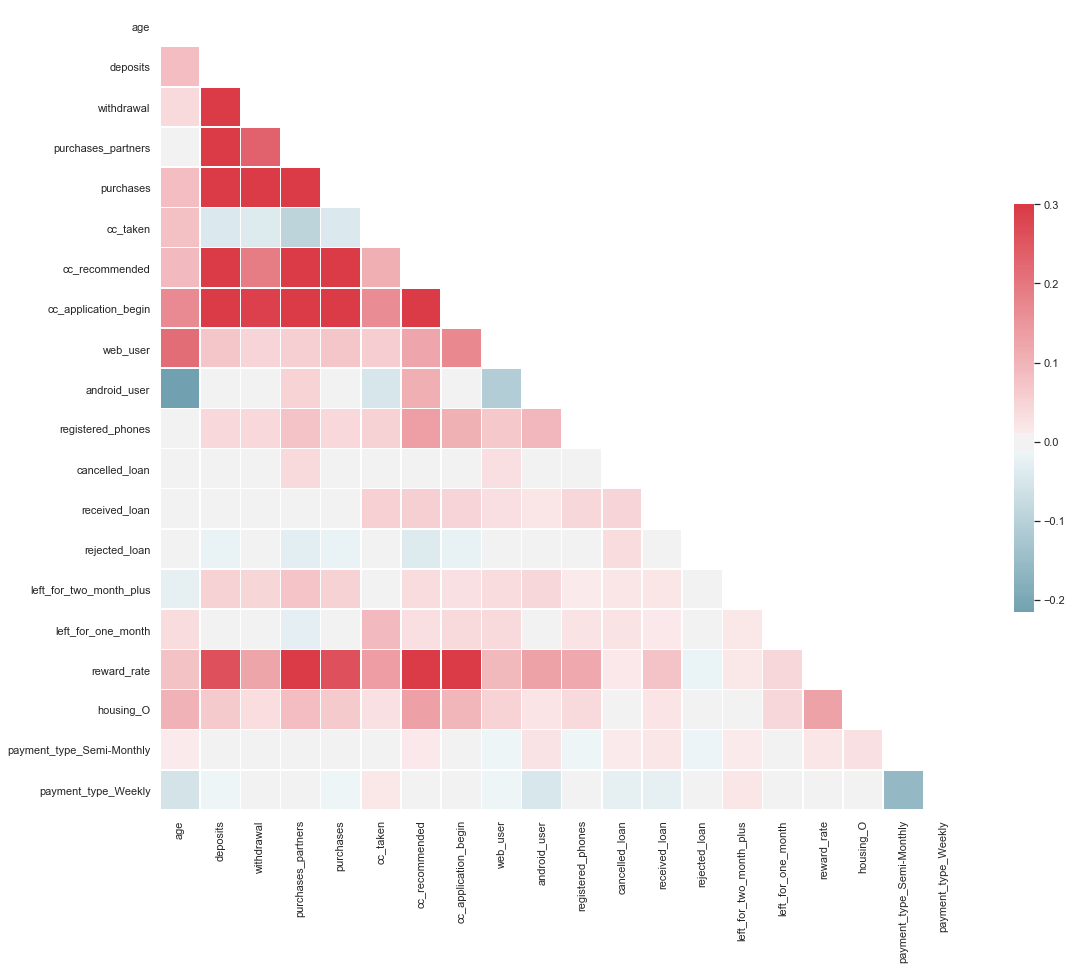

In [140]:
# New Correlation Matrix
sns.set(style="white")

# Compute the correlation matrix
corr = X_train[X_train.columns[rfe.support_]].corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(18, 15))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(h_neg = 220, h_pos = 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})  

Test Data Accuracy: 0.606


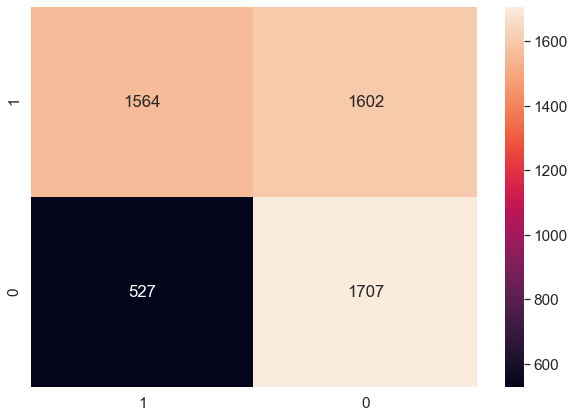

In [141]:
# Re-training the model with the top 20 most significant predictors

classifier.fit(X_train[X_train.columns[rfe.support_]], y_train)

# Predicting Test Set
y_pred = classifier.predict(X_test[X_train.columns[rfe.support_]])

# Evaluating Results
cm2 = confusion_matrix(y_test, y_pred)

df_cm2 = pd.DataFrame(cm2, index = (1, 0), columns = (1, 0))
plt.figure(figsize = (10,7))
sns.set(font_scale=1.4)
sns.heatmap(df_cm2, annot=True, fmt='g')
print("Test Data Accuracy: %0.3f" % accuracy_score(y_test, y_pred))

In [143]:
# Applying k-Fold Cross Validation
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = classifier,
                             X = X_train[X_train.columns[rfe.support_]],
                             y = y_train, cv = 10)
print("10-fold Cross-validated accuracy: %0.3f (+/- %0.3f)" % (accuracies.mean(), accuracies.std() * 2))

# Analyzing Coefficients
pd.concat([pd.DataFrame(X_train[X_train.columns[rfe.support_]].columns, columns = ["features"]),
           pd.DataFrame(np.transpose(classifier.coef_), columns = ["coef"])
           ],axis = 1)

10-fold Cross-validated accuracy: 0.642 (+/- 0.019)


,features,coef
0,age,-0.148564
1,deposits,0.270502
2,withdrawal,0.040702
3,purchases_partners,-0.741181
4,purchases,-0.394750
5,cc_taken,0.087211
6,cc_recommended,0.044847
7,cc_application_begin,0.038517
8,web_user,0.110583
9,android_user,-0.061248


In [144]:
# Formatting Final Results
final_results = pd.concat([y_test, user_identifier], axis = 1).dropna()
final_results['predicted_churn'] = y_pred
final_results = final_results[['user', 'churn', 'predicted_churn']].reset_index(drop=True)

In [145]:
final_results

,user,churn,predicted_churn
0,61353,1.0,1
1,67679,0.0,0
2,21269,0.0,0
3,69531,0.0,1
4,25997,0.0,0
...,...,...,...
5395,22377,0.0,1
5396,24291,1.0,1
5397,23740,0.0,1
5398,47663,1.0,0
